## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



In [57]:
#imporitng the required packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#filter warnings
import warnings
warnings.filterwarnings('ignore')

## Step1: Reading & Uderstanding the Data

In [2]:
# Read the data from csv file

df = pd.read_csv('Bike_Sharing_Dataset.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#Checking the shape
df.shape

(730, 16)

In [7]:
# check for the null values in the data

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Inference
1) There are 730 rows and 16 columns
2) There are no NULL values
3) cnt = Casual + registered

## Step 2: Cleaning & Processing the Data

In [8]:
# renaming few columns for better readibility

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity', 'cnt':'count'}, inplace=True)

Dropping unwanted columns

In [9]:

# 'instant' column contains only index 
# 'dteday' column contains date data which can be compensated by 'year' and 'month' columns,
# 'casual' + 'registered' = Count, so dropping these columns.

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [10]:
# Converting season into categorical values
# Accroding to data dictionary - season : season (1:spring, 2:summer, 3:fall, 4:winter)

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})


In [11]:
# Converting month ( 1 to 12) which is numberic into categorical values

df.month = df.month.map({
    1:'jan',
    2:'feb',
    3:'mar',
    4:'apr',
    5:'may',
    6:'jun',
    7:'july',
    8:'aug',
    9:'sep',
    10:'oct',
    11:'nov',
    12:'dec'
})

In [12]:
# Converting weekday into Categorical variables

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [13]:
# Converting weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [14]:
df

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,thu,1,Misty,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,dec,0,fri,1,Misty,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,dec,0,sat,0,Misty,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,dec,0,sun,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Step3: Visualizing the data

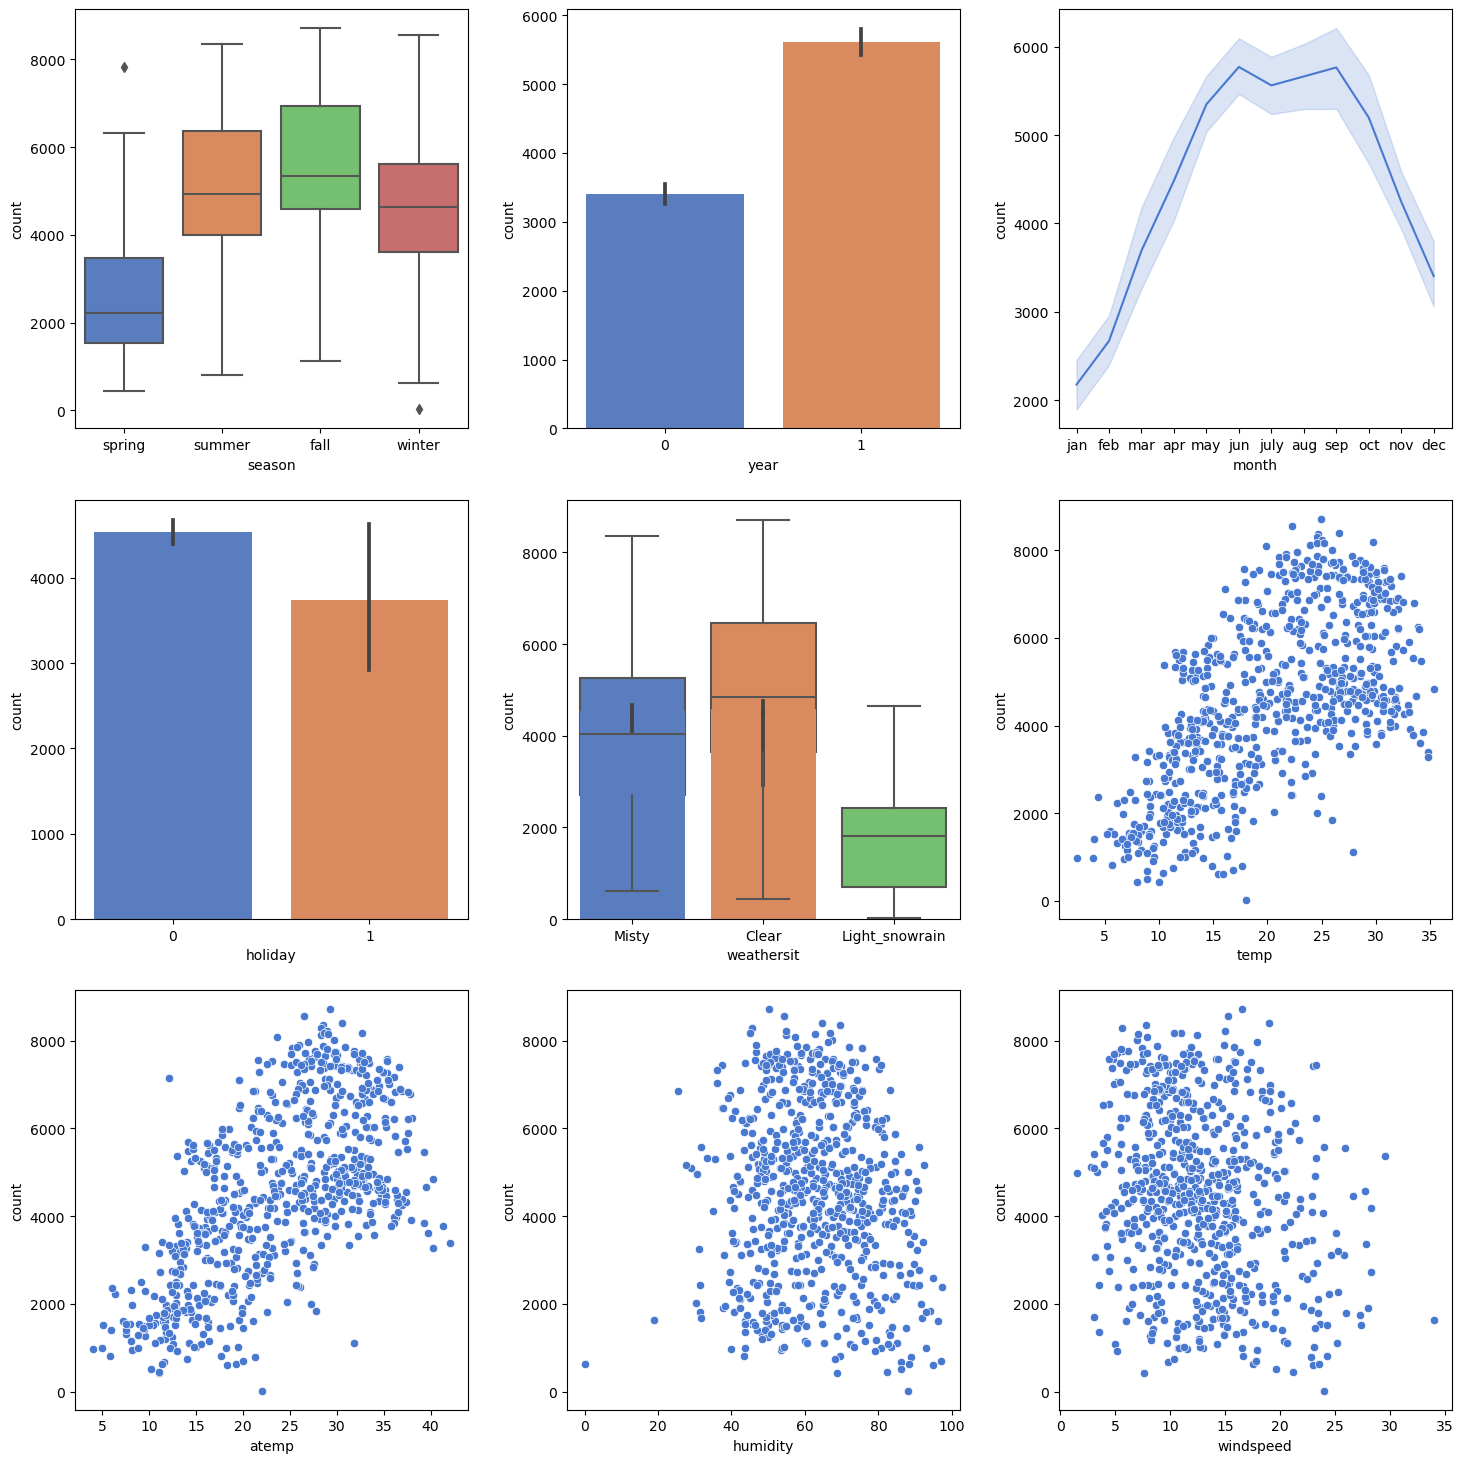

In [15]:
# Analysing categorical variables

plt.figure(figsize=(15, 15))
sns.set_palette("muted")

# Season vs. Count
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'count', data = df)

# Year vs. Count
plt.subplot(3,3,2)
sns.barplot(x = 'year', y = 'count', data = df)

# Month vs. Count
plt.subplot(3,3,3)
sns.lineplot(x = 'month', y = 'count', data = df)

# Holiday vs. Count
plt.subplot(3,3,4)
sns.barplot(x = 'holiday', y = 'count', data = df)

# Weekday vs. Count
plt.subplot(3,3,5)
sns.barplot(x = 'holiday', y = 'count', data = df)

# Workingday vs. Count
plt.subplot(3,3,5)
sns.barplot(x = 'workingday', y = 'count', data = df)

# Weather Situation vs. Count
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'count', data = df)

# Temperature vs. Count
plt.subplot(3,3,6)
sns.scatterplot(x = 'temp', y = 'count', data = df)

# Actual Temperature vs. Count
plt.subplot(3,3,7)
sns.scatterplot(x = 'atemp', y = 'count', data = df)

# Humidity vs. Count
plt.subplot(3,3,8)
sns.scatterplot(x = 'humidity', y = 'count', data = df)

# Windspeed vs. Count
plt.subplot(3,3,9)
sns.scatterplot(x = 'windspeed', y = 'count', data = df)


plt.tight_layout(pad=2.0)  # Add padding between plots
plt.show()


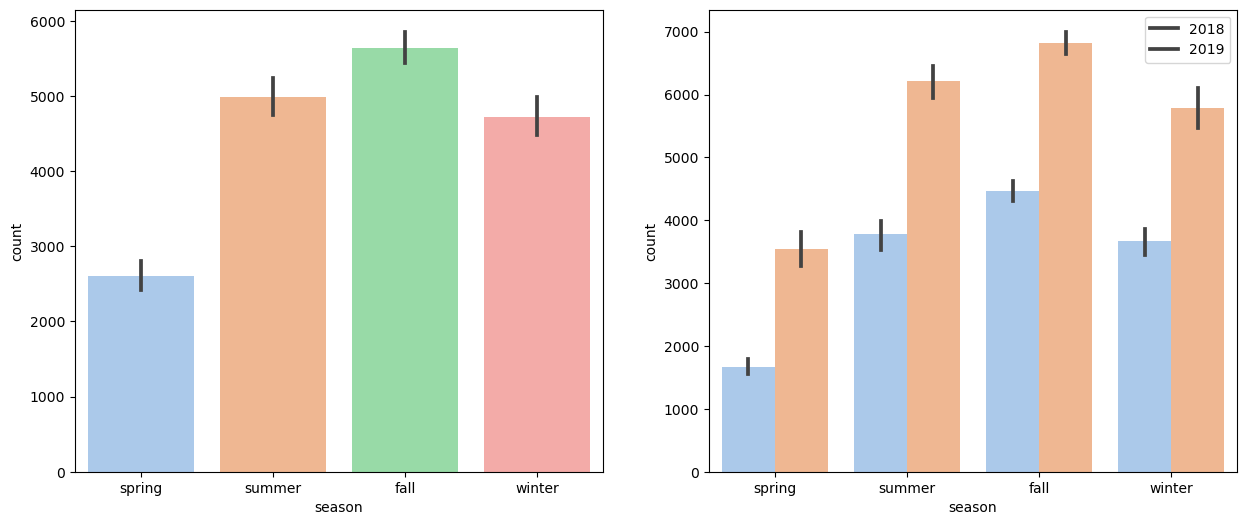

In [26]:
plt.figure(figsize=(15, 6))
sns.set_palette("pastel")

# Season vs. Count
plt.subplot(1,2,1)
sns.barplot(x = 'season', y = 'count', data = df)

plt.subplot(1,2,2)
sns.barplot(x = 'season', y = 'count', data = df, hue='year')
plt.legend(labels=['2018', '2019'])

plt.show()


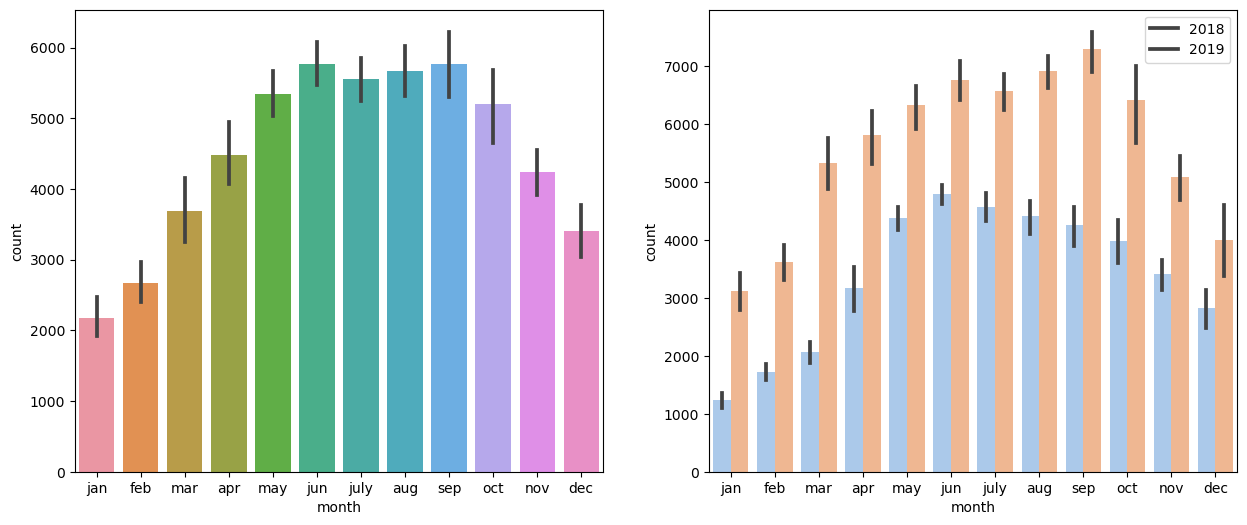

In [27]:
plt.figure(figsize=(15, 6))
sns.set_palette("pastel")

# Season vs. Count
plt.subplot(1,2,1)
sns.barplot(x = 'month', y = 'count', data = df)

plt.subplot(1,2,2)
sns.barplot(x = 'month', y = 'count', data = df, hue='year')
plt.legend(labels=['2018', '2019'])

plt.show()

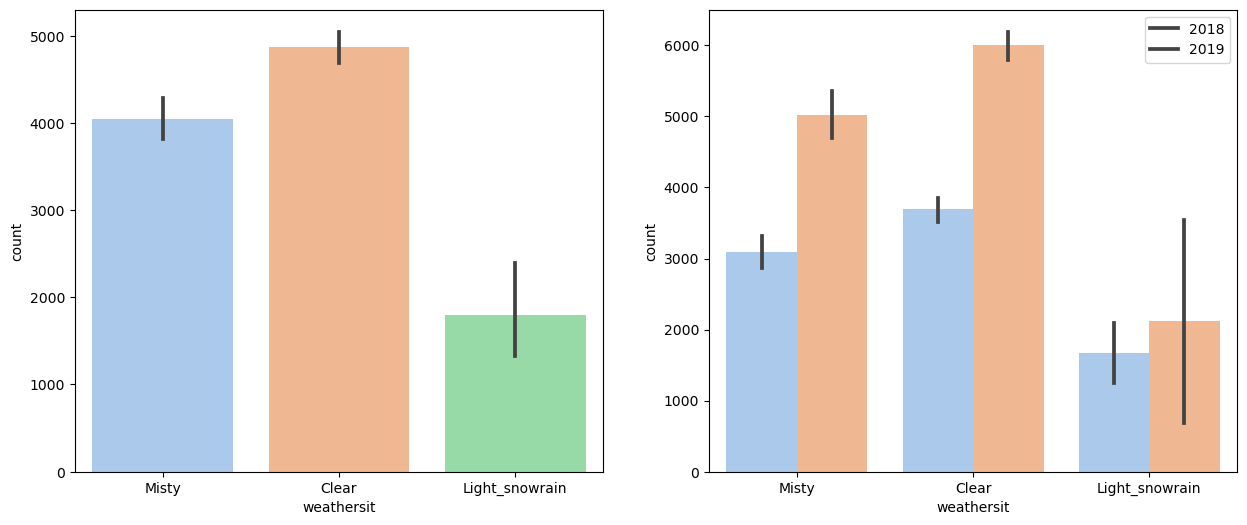

In [28]:
plt.figure(figsize=(15, 6))
sns.set_palette("pastel")

# Season vs. Count
plt.subplot(1,2,1)
sns.barplot(x = 'weathersit', y = 'count', data = df)

plt.subplot(1,2,2)
sns.barplot(x = 'weathersit', y = 'count', data = df, hue='year')
plt.legend(labels=['2018', '2019'])

plt.show()

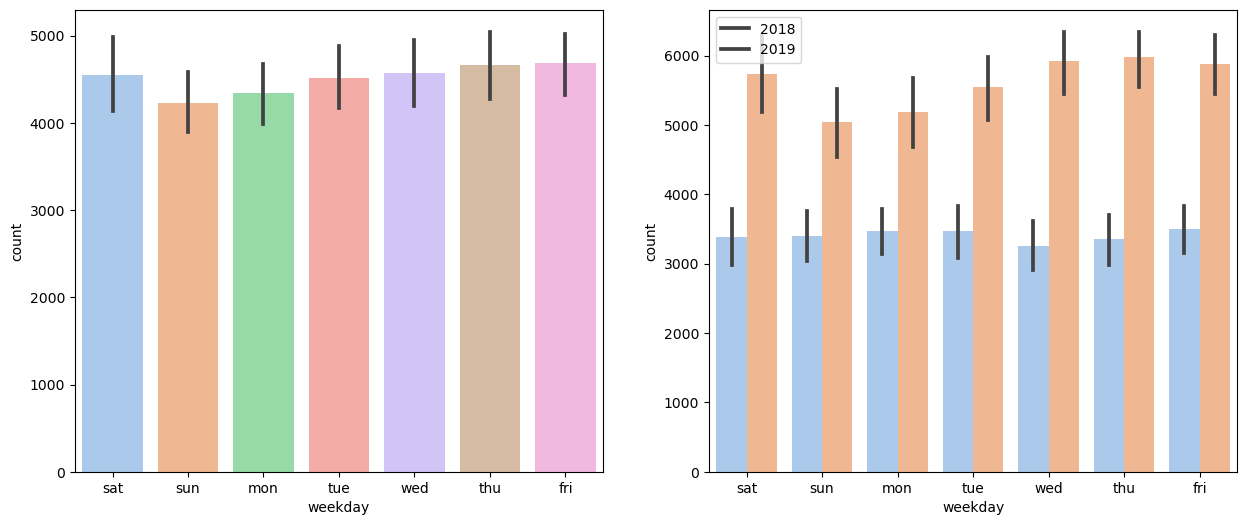

In [29]:
plt.figure(figsize=(15, 6))
sns.set_palette("pastel")

# Season vs. Count
plt.subplot(1,2,1)
sns.barplot(x = 'weekday', y = 'count', data = df)

plt.subplot(1,2,2)
sns.barplot(x = 'weekday', y = 'count', data = df, hue='year')
plt.legend(labels=['2018', '2019'])

plt.show()

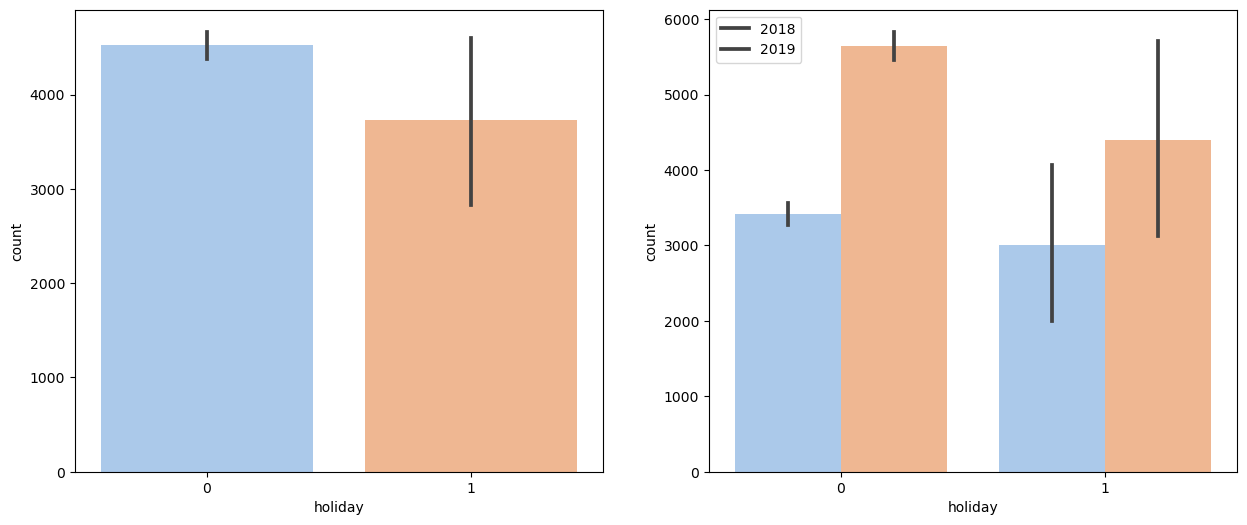

In [30]:
plt.figure(figsize=(15, 6))
sns.set_palette("pastel")

# Season vs. Count
plt.subplot(1,2,1)
sns.barplot(x = 'holiday', y = 'count', data = df)

plt.subplot(1,2,2)
sns.barplot(x = 'holiday', y = 'count', data = df, hue='year')
plt.legend(labels=['2018', '2019'])

plt.show()

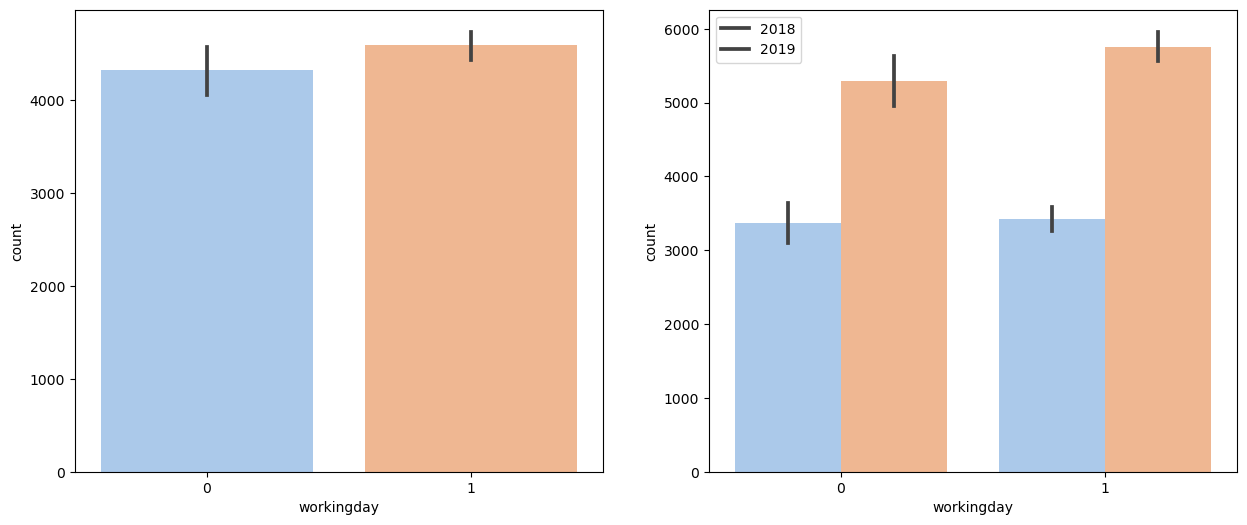

In [31]:
plt.figure(figsize=(15, 6))
sns.set_palette("pastel")

# Season vs. Count
plt.subplot(1,2,1)
sns.barplot(x = 'workingday', y = 'count', data = df)

plt.subplot(1,2,2)
sns.barplot(x = 'workingday', y = 'count', data = df, hue='year')
plt.legend(labels=['2018', '2019'])

plt.show()

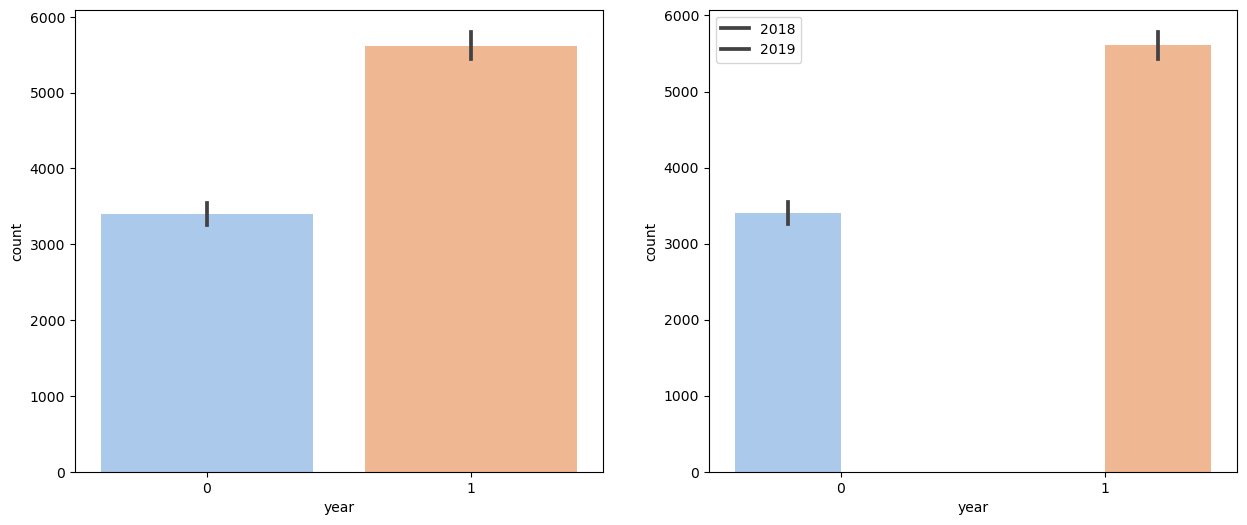

In [32]:
plt.figure(figsize=(15, 6))
sns.set_palette("pastel")

# Season vs. Count
plt.subplot(1,2,1)
sns.barplot(x = 'year', y = 'count', data = df)

plt.subplot(1,2,2)
sns.barplot(x = 'year', y = 'count', data = df, hue='year')
plt.legend(labels=['2018', '2019'])

plt.show()

1. Seasonal Analysis:
Fall has the highest average rentals, followed closely by summer.

2. Year-wise Rentals:
2019 sees a notable increase with a median rise of approximately 2000 rentals compared to 2018.

3. Monthly Trend:
September tops the monthly rental count, with surrounding months showing substantial demand.
The trend aligns with seasonal patterns, indicating a correlation between rentals and seasons.

4. Holiday vs. Working Days:
Holidays generally result in lower rental counts compared to working days.
Holidays exhibit greater variability in rental demand.

5. Weekday Analysis:
Overall, no significant difference in rentals across weekdays is observed.
Thursdays and Sundays stand out with higher variability in rental counts compared to other weekdays.

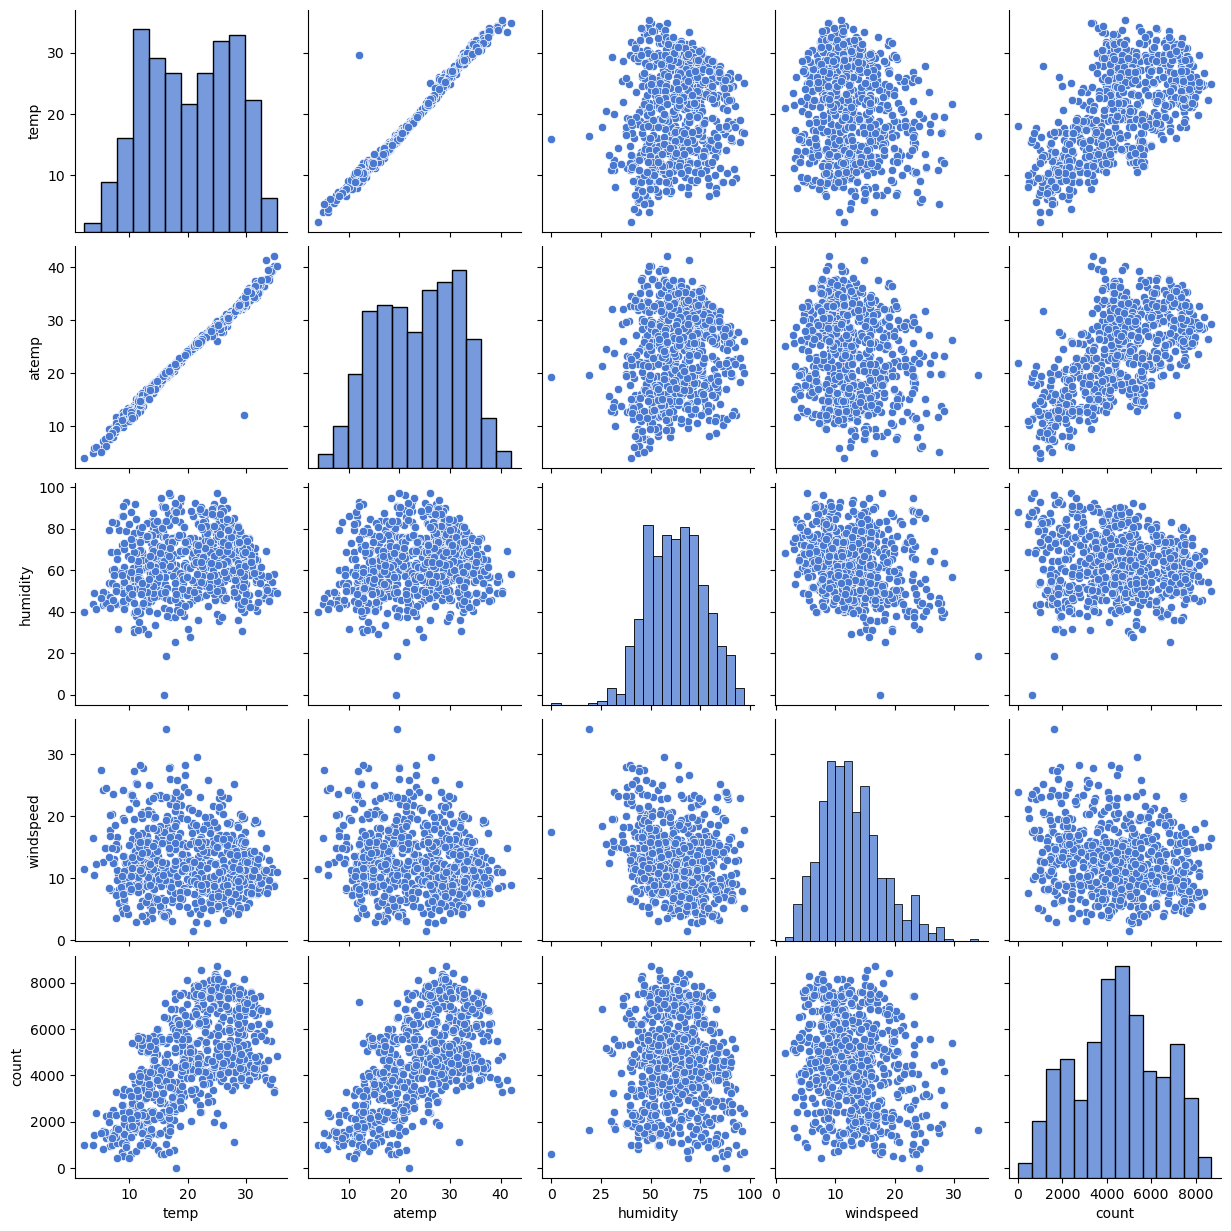

In [33]:
# Analysing/visualizing the numerical columns

sns.set_palette("muted")
sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','count'])
plt.show()

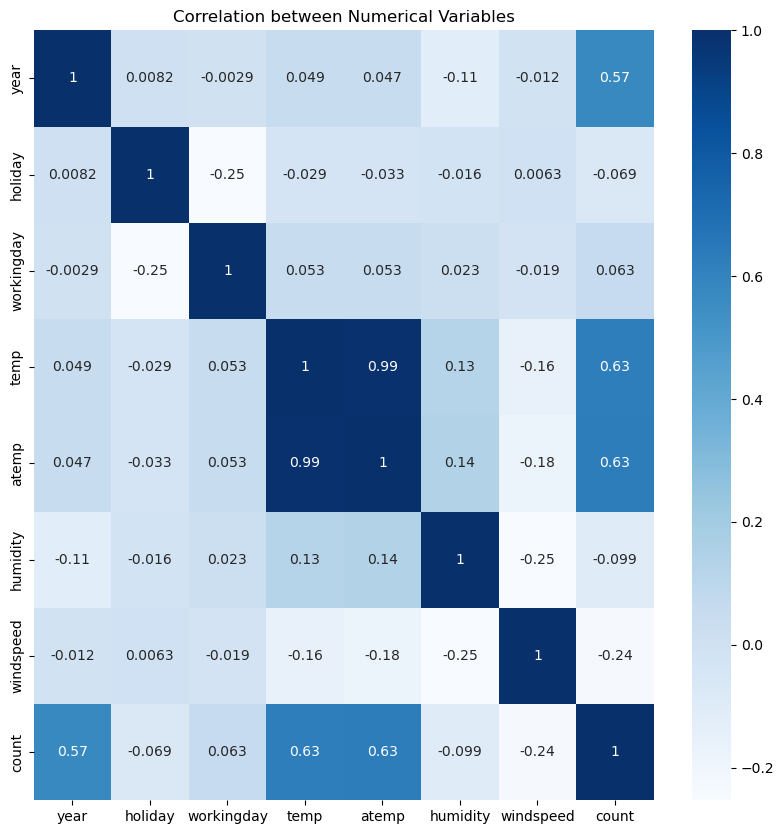

In [39]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (10,10))

sns.heatmap(df[['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'count']].corr(), annot = True, cmap = "Blues")
plt.title("Correlation between Numerical Variables")
plt.show()

Highest correlation with 'count' is seen in 'temp' followed by 'year'.

When the correlation between two features is close to 1 (or -1), it indicates high similarity, and dropping one of the highly correlated features is advisable

In [90]:
# Drop the column "atemp" from the DataFrame 'df'
df.drop(columns=["atemp"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   humidity    730 non-null    float64
 9   windspeed   730 non-null    float64
 10  count       730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


## Step 3: Data Preparation

In [91]:
# Create dummy variables for the features month, weekday, weathersit and season.

months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [92]:
# Merging  the dataframe, with the dummy variable dataset. 

df = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [93]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [94]:
# dropping unnecessary columns as we have already created dummy variables out of those.

df.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [95]:
# check the shape of new dataframe

df.shape

(730, 29)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   humidity        730 non-null    float64
 5   windspeed       730 non-null    float64
 6   count           730 non-null    int64  
 7   aug             730 non-null    uint8  
 8   dec             730 non-null    uint8  
 9   feb             730 non-null    uint8  
 10  jan             730 non-null    uint8  
 11  july            730 non-null    uint8  
 12  jun             730 non-null    uint8  
 13  mar             730 non-null    uint8  
 14  may             730 non-null    uint8  
 15  nov             730 non-null    uint8  
 16  oct             730 non-null    uint8  
 17  sep             730 non-null    uin

## Step 4: Splitting the Data into Training & Test sets

In [98]:
# splitting the dataframe into Train and Test

np.random.seed(0)

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [99]:
df_train.shape

(510, 29)

In [100]:
df_test.shape

(219, 29)

#### Rescaling the features

In [101]:
# Using MinMaxScalar
# Create an instance of the MinMaxScaler class

scaler = MinMaxScaler()

In [103]:
num_vars = num_vars = ['temp','humidity','windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [105]:
# Checking 5 columns 

df_train.head()

,year,holiday,workingday,temp,humidity,windspeed,count,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,0.509887,0.575354,0.300794,7534,0,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,4066,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,1796,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,4220,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [106]:
df_train.describe()

,year,holiday,workingday,temp,humidity,windspeed,count,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,4486.382353,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,1952.158739,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,3120.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,4530.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,5973.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


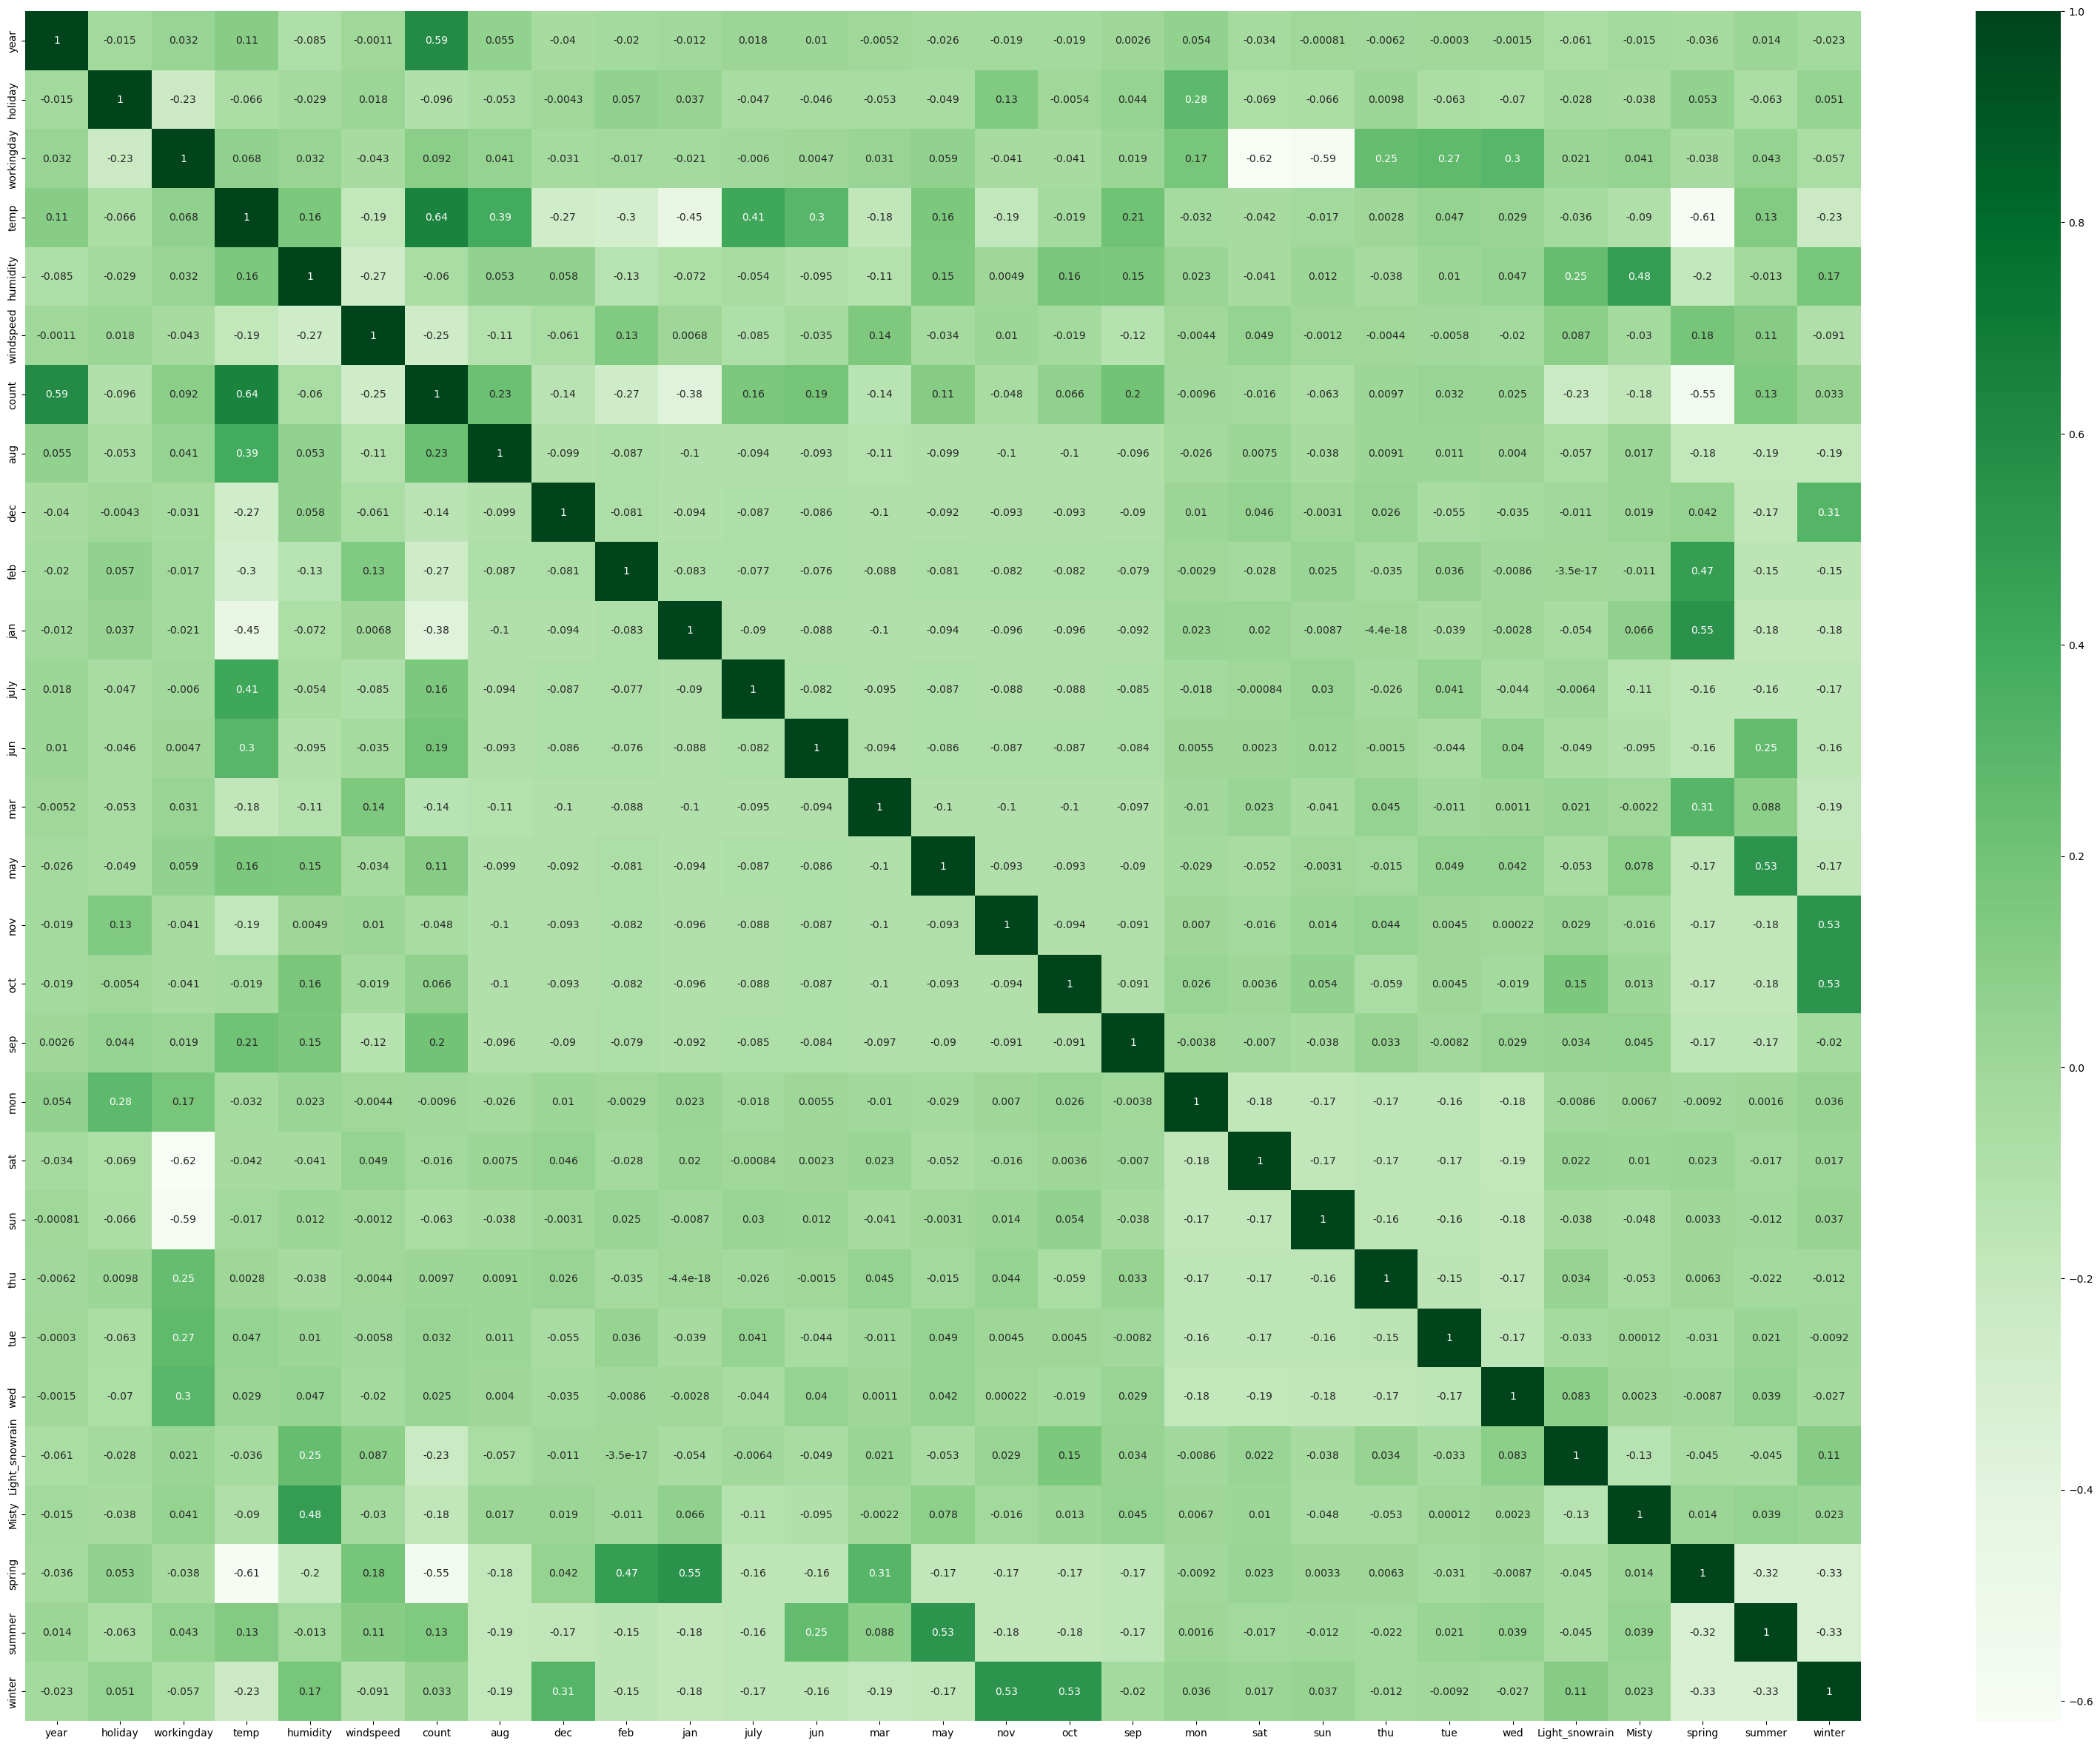

In [107]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (40, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="Greens")
plt.show()

Features like count, month etc seems correlated

#### Dividing into X and Y sets for the model building

In [108]:
# Separating the target variable "count" from the features in the training data

y_train = df_train.pop("count")
x_train = df_train

## Step 5: Building a Linear Model

Fit a regression line through the training data using statsmodels.In statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

### Model 1: Linear regression

In [109]:
# Import the statsmodels library
import statsmodels.api as sm

# Add a constant column to the DataFrame 'x_train' containing only the "temp" feature
x_train_lm = sm.add_constant(x_train[["temp"]])

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
lr = sm.OLS(y_train, x_train_lm).fit()

In [110]:
lr.params

const    1497.882426
temp     5562.458744
dtype: float64

In [111]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           5.80e-61
Time:                        11:44:19   Log-Likelihood:                -4450.9
No. Observations:                 510   AIC:                             8906.
Df Residuals:                     508   BIC:                             8914.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1497.8824    171.056      8.757      0.0

In [112]:
x_train.columns

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'aug',
       'dec', 'feb', 'jan', 'july', 'jun', 'mar', 'may', 'nov', 'oct', 'sep',
       'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'Light_snowrain', 'Misty',
       'spring', 'summer', 'winter'],
      dtype='object')

### Model 2: Multiple Linear Regression model using all variables

In [113]:
# Add a constant column to the DataFrame 'x_train' using statsmodels
x_train_lm = sm.add_constant(x_train)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_2 = sm.OLS(y_train, x_train_lm).fit()

In [114]:
mlr_2.params

const             2147.874512
year              2017.549844
holiday             90.962141
workingday         846.515447
temp              3916.282212
humidity         -1315.447663
windspeed        -1620.652248
aug                125.199371
dec               -396.232619
feb               -280.593454
jan               -545.654115
july              -350.722818
jun                -25.835995
mar                  9.084485
may                208.086047
nov               -363.771604
oct                 65.481937
sep                704.572642
mon               -181.721302
sat                842.210158
sun                368.186767
thu                -80.285776
tue               -164.190546
wed                -46.828209
Light_snowrain   -2237.692692
Misty             -530.789140
spring            -418.598099
summer             336.594431
winter             920.021411
dtype: float64

In [115]:
print(mlr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          8.74e-182
Time:                        11:45:43   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     482   BIC:                             8370.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2147.8745    306.272      7.

#### Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

In [116]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,85.58
18,sat,19.72
19,sun,18.35
25,spring,10.79
27,winter,9.50
26,summer,8.29
3,temp,7.12
14,nov,6.80
15,oct,6.59
6,aug,6.43


We want a VIF that around or less than 5. So there are clearly some variables have high vif. We need to drop them.

In [117]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

# Running RFE with the output number of variables equal to 10
lm = LinearRegression()
lm.fit(x_train, y_train)

# Assuming X_train is your feature matrix
rfe = RFE(lm,n_features_to_select=20)              
rfe = rfe.fit(x_train, y_train)

In [118]:
rfe_table=pd.DataFrame(list(zip(x_train.columns,rfe.support_,rfe.ranking_)),columns=["Feature","support","Rank"])
rfe_table.sort_values(by="Rank",ascending=True)

,Feature,support,Rank
0,year,True,1
25,spring,True,1
24,Misty,True,1
23,Light_snowrain,True,1
19,sun,True,1
18,sat,True,1
16,sep,True,1
14,nov,True,1
26,summer,True,1
10,july,True,1


In [119]:
# selecting columns based of RFE
selected_features= x_train.columns[rfe.support_]
selected_features

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'dec',
       'feb', 'jan', 'july', 'may', 'nov', 'sep', 'sat', 'sun',
       'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [120]:
#Selecting selected feature for model creation
x_train_rfe = x_train[selected_features]

In [121]:
x_train_rfe.head()

,year,holiday,workingday,temp,humidity,windspeed,dec,feb,jan,july,may,nov,sep,sat,sun,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,0.509887,0.575354,0.300794,0,0,0,0,0,0,0,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,0,1,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,1,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,0,1,0,0,1,0,1,0


### Model 3: RFE

In [122]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_lm = sm.add_constant(x_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_3 = sm.OLS(y_train, x_train_lm).fit()

# Print the summary of the regression model
print(mlr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.59e-189
Time:                        11:49:14   Log-Likelihood:                -4099.5
No. Observations:                 510   AIC:                             8239.
Df Residuals:                     490   BIC:                             8324.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2179.6234    262.010      8.

#### Checking VIF

In [123]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,60.93
13,sat,14.59
14,sun,13.91
17,spring,5.79
3,temp,4.88
19,winter,3.88
18,summer,3.49
1,holiday,3.43
8,jan,2.38
4,humidity,1.97


### Model 4

In [124]:
# Drop the column "hum" from the DataFrame 'x_train_rfe'
x_train_rfe.drop(["workingday"], axis=1, inplace=True)

In [125]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_lm = sm.add_constant(x_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_4 = sm.OLS(y_train, x_train_lm).fit()

# Print the summary of the regression model
print(mlr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.59e-189
Time:                        11:50:59   Log-Likelihood:                -4099.5
No. Observations:                 510   AIC:                             8239.
Df Residuals:                     490   BIC:                             8324.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3000.4814    321.338      9.

In [126]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,31.86
2,temp,18.45
16,spring,5.47
4,windspeed,4.85
18,winter,4.09
17,summer,3.35
7,jan,2.38
15,Misty,2.34
0,year,2.10
6,feb,1.92


### Model 5:
Removing the variable humidity based on its Very High 'VIF' value.

In [127]:
# Drop the column "humidity" from the DataFrame 'x_train_rfe'
x_train_rfe.drop(["humidity"], axis=1, inplace=True)

In [128]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_lm = sm.add_constant(x_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_5 = sm.OLS(y_train, x_train_lm).fit()

# Print the summary of the regression model
print(mlr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.4
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          3.94e-187
Time:                        11:52:06   Log-Likelihood:                -4108.0
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     491   BIC:                             8334.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2379.7080    286.928      8.

In [129]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.43
3,windspeed,4.79
15,spring,4.37
17,winter,3.03
16,summer,2.81
6,jan,2.21
0,year,2.09
5,feb,1.88
9,nov,1.82
7,july,1.60


### Model 6: 
Removing the variable 'may' based on it's high p-values

In [130]:
# Drop the column "may" from the DataFrame 'x_train_rfe'
x_train_rfe.drop(["may"], axis=1, inplace=True)

In [131]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_lm = sm.add_constant(x_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_6 = sm.OLS(y_train, x_train_lm).fit()

# Print the summary of the regression model
print(mlr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.3
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          4.80e-188
Time:                        12:18:56   Log-Likelihood:                -4108.4
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     492   BIC:                             8329.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2333.4390    282.745      8.

### Model 7: 
Removing the variable 'sat' based on it's high p-values

In [133]:
# Drop the column "sat" from the DataFrame 'x_train_rfe'
x_train_rfe.drop(["sat"], axis=1, inplace=True)

In [134]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_lm = sm.add_constant(x_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_7 = sm.OLS(y_train, x_train_lm).fit()

# Print the summary of the regression model
print(mlr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.2
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          6.17e-189
Time:                        12:20:14   Log-Likelihood:                -4109.0
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     493   BIC:                             8324.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2354.5290    282.031      8.

In [135]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.27
3,windspeed,4.67
13,spring,4.34
15,winter,3.01
14,summer,2.24
6,jan,2.21
0,year,2.08
5,feb,1.88
8,nov,1.81
7,july,1.60


### Model 8:
Removing the variable 'feb' based on its Very High p-value.

In [136]:
# Drop the column "feb" from the DataFrame 'x_train_rfe'
x_train_rfe.drop(["feb"], axis=1, inplace=True)

In [137]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_lm = sm.add_constant(x_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_8 = sm.OLS(y_train, x_train_lm).fit()

# Print the summary of the regression model
print(mlr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.7
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.98e-189
Time:                        12:21:38   Log-Likelihood:                -4110.5
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     494   BIC:                             8321.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2240.5860    274.747      8.

In [138]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.21
3,windspeed,4.67
14,winter,2.97
12,spring,2.92
13,summer,2.24
0,year,2.07
7,nov,1.80
5,jan,1.66
6,july,1.60
11,Misty,1.56


### Model 9:
Removing the variable 'summer' based on its Very High p-value.

In [139]:
# Drop the column "summer" from the DataFrame 'x_train_rfe'
x_train_rfe.drop(["summer"], axis=1, inplace=True)

In [140]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_lm = sm.add_constant(x_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_9 = sm.OLS(y_train, x_train_lm).fit()

# Print the summary of the regression model
print(mlr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.7
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.64e-189
Time:                        12:22:57   Log-Likelihood:                -4113.1
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     495   BIC:                             8320.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2618.6055    217.080     12.

In [141]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.73
3,windspeed,4.05
13,winter,2.56
12,spring,2.38
0,year,2.06
7,nov,1.80
5,jan,1.65
11,Misty,1.53
4,dec,1.46
6,july,1.36


### Model 10:
Removing the variable 'nov' based on its Very High p-value.

In [142]:
# Drop the columns "nov" from the DataFrame 'x_train_rfe'

x_train_rfe.drop(["nov"], axis=1, inplace=True)

In [143]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_lm = sm.add_constant(x_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_10 = sm.OLS(y_train, x_train_lm).fit()

# Print the summary of the regression model
print(mlr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.2
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          4.34e-189
Time:                        12:25:12   Log-Likelihood:                -4116.8
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     496   BIC:                             8321.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2506.5463    214.494     11.

In [144]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.70
3,windspeed,4.01
11,spring,2.38
0,year,2.06
12,winter,1.66
5,jan,1.64
10,Misty,1.53
6,july,1.36
4,dec,1.29
7,sep,1.20


### Model 11:

Removing the variable 'dec' based on its Very High p-value.


In [145]:
# Drop the columns "dec" from the DataFrame 'x_train_rfe'

x_train_rfe.drop(["dec"], axis=1, inplace=True)

In [146]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_lm = sm.add_constant(x_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_11 = sm.OLS(y_train, x_train_lm).fit()

# Print the summary of the regression model
print(mlr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     218.0
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          3.50e-189
Time:                        12:26:38   Log-Likelihood:                -4119.4
No. Observations:                 510   AIC:                             8265.
Df Residuals:                     497   BIC:                             8320.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2402.3359    210.266     11.

In [147]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.69
3,windspeed,4.01
10,spring,2.26
0,year,2.06
4,jan,1.60
9,Misty,1.53
11,winter,1.42
5,july,1.36
6,sep,1.20
7,sun,1.18


### Model 12:
Removing the variable 'jan' based on its Very High p-value.


In [151]:
# Drop the columns "jan" from the DataFrame 'x_train_rfe'

x_train_rfe.drop(["jan"], axis=1, inplace=True)

In [152]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_lm = sm.add_constant(x_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_12 = sm.OLS(y_train, x_train_lm).fit()

# Print the summary of the regression model
print(mlr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.8
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          4.60e-189
Time:                        12:29:19   Log-Likelihood:                -4122.5
No. Observations:                 510   AIC:                             8269.
Df Residuals:                     498   BIC:                             8320.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2279.2127    205.332     11.

In [153]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.67
3,windspeed,4.01
0,year,2.06
9,spring,1.66
8,Misty,1.52
10,winter,1.41
4,july,1.35
5,sep,1.20
6,sun,1.18
7,Light_snowrain,1.08


The VIFs and p-values both are within an acceptable range.

## Step 6: Residual Analysis of the train data


Checking if the error terms are also normally distributed

In [154]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_sm = sm.add_constant(x_train_rfe)

In [156]:
# Predict the target variable 'y_train' using the trained regression model 'mlr_11' and the DataFrame 'x_train_sm'
y_train_pred = mlr_12.predict(x_train_sm)

Text(0.5, 0, 'Errors')

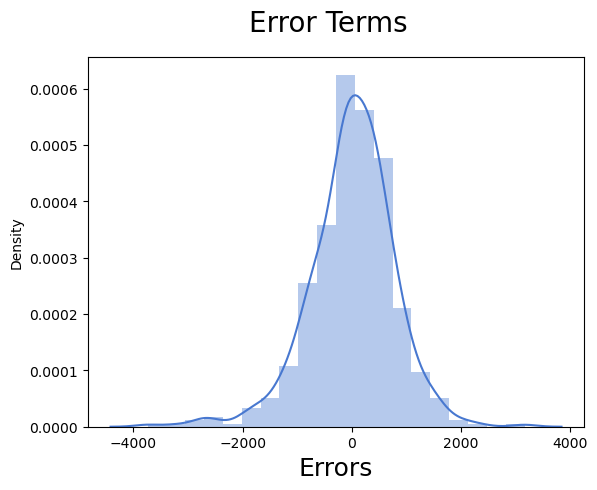

In [157]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

## Step 7: Making Predictions using the Final Model

In [158]:
num_vars = num_vars = ['temp','humidity','windspeed']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [159]:
df_test.describe()

,year,holiday,workingday,temp,humidity,windspeed,count,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.508750,0.418870,4546.981735,0.059361,0.086758,0.100457,...,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.459904,0.249189,0.201253,0.188111,1898.633630,0.236840,0.282125,0.301297,...,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,441.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.358469,0.283817,3303.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.494200,0.402533,4579.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.651165,0.524362,5869.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [160]:
y_test = df_test.pop('count')
x_test = df_test

In [161]:
# Adding constant variable to test dataframe
x_test_mlr_12 = sm.add_constant(x_test)

In [162]:
x_train_rfe.head()

,year,holiday,temp,windspeed,july,sep,sun,Light_snowrain,Misty,spring,winter
653,1,0,0.509887,0.300794,0,0,0,0,0,0,1
576,1,0,0.815169,0.264686,1,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,1,1,0
728,1,0,0.245101,0.663106,0,0,1,0,0,1,0
482,1,0,0.395666,0.188475,0,0,0,0,1,0,0


In [164]:
x_train_rfe.columns

Index(['year', 'holiday', 'temp', 'windspeed', 'july', 'sep', 'sun',
       'Light_snowrain', 'Misty', 'spring', 'winter'],
      dtype='object')

In [166]:
x_test_mlr_12= x_test_mlr_12[['year', 'holiday', 'temp', 'windspeed', 'july', 'sep', 'sun',
       'Light_snowrain', 'Misty', 'spring', 'winter']]

In [167]:
# checking X_test_mlr_12
x_test_mlr_12.head()

,year,holiday,temp,windspeed,july,sep,sun,Light_snowrain,Misty,spring,winter
184,0,1,0.837241,0.149393,1,0,0,0,1,0,0
535,1,0,0.911423,0.231142,0,0,0,0,0,0,0
299,0,0,0.496221,0.443398,0,0,0,0,1,0,1
221,0,0,0.890387,0.449707,0,0,0,0,0,0,0
152,0,0,0.821739,0.682387,0,0,0,0,0,0,0


In [168]:
# Adding constant 
x_test_mlr_12 = sm.add_constant(x_test_mlr_12)

In [169]:
# Making predictions using the fourth model

y_test_pred_mlr_12 = mlr_12.predict(x_test_mlr_12)

## Step 8: Model Evaluation
plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred_mlr_12')

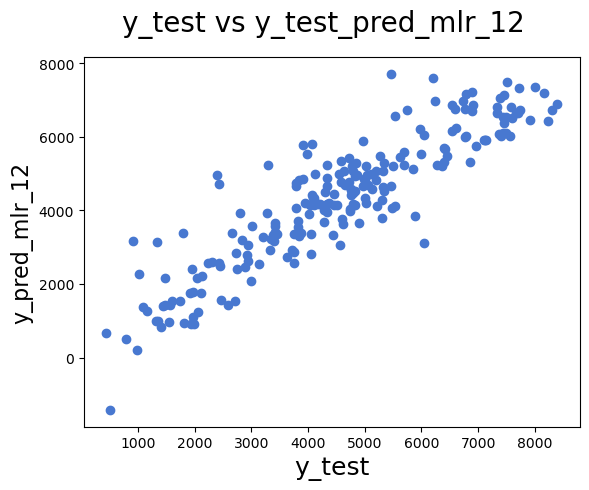

In [170]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred_mlr_12)
fig.suptitle('y_test vs y_test_pred_mlr_12', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                                      # X-label
plt.ylabel('y_pred_mlr_12', fontsize = 16)

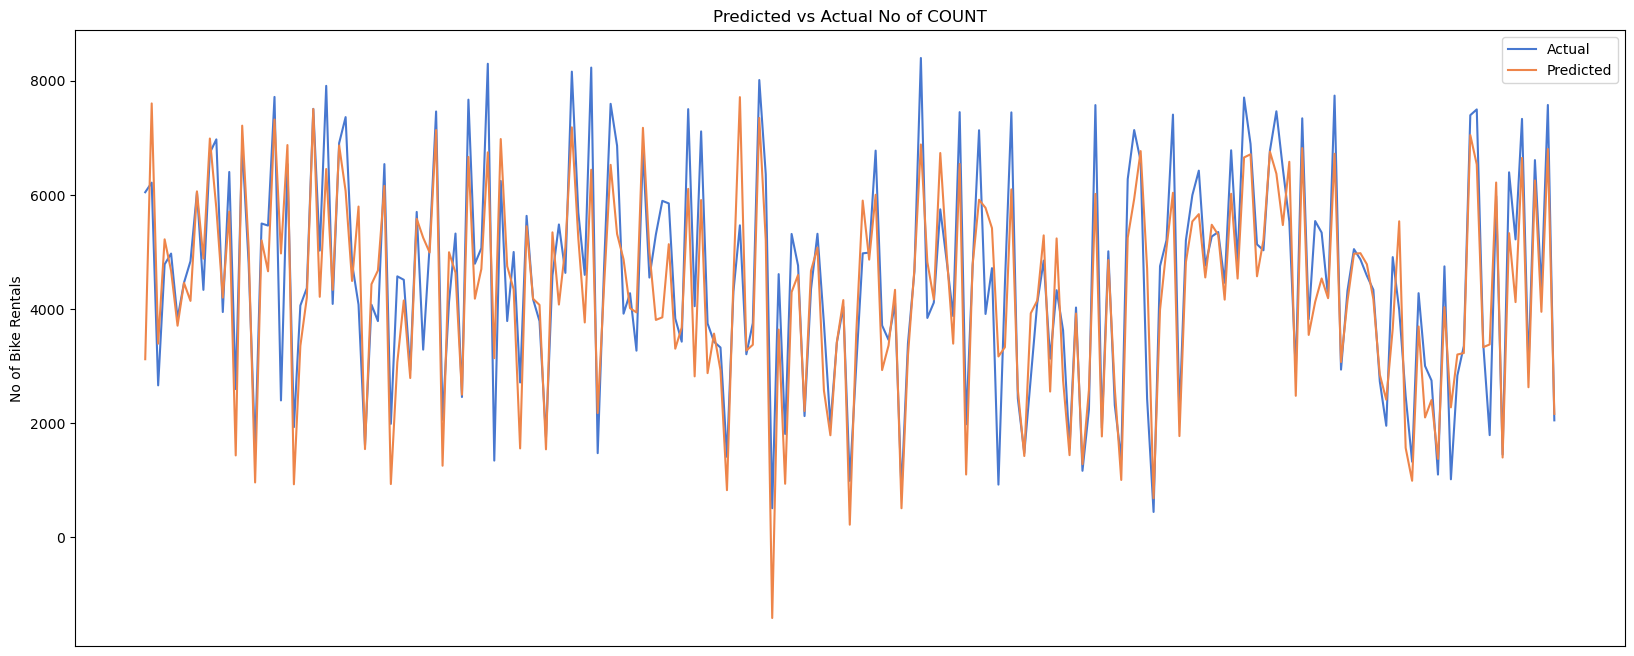

In [171]:
# Plotting Actual vs Predicted 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred_mlr_12)),y_test_pred_mlr_12)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of COUNT');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

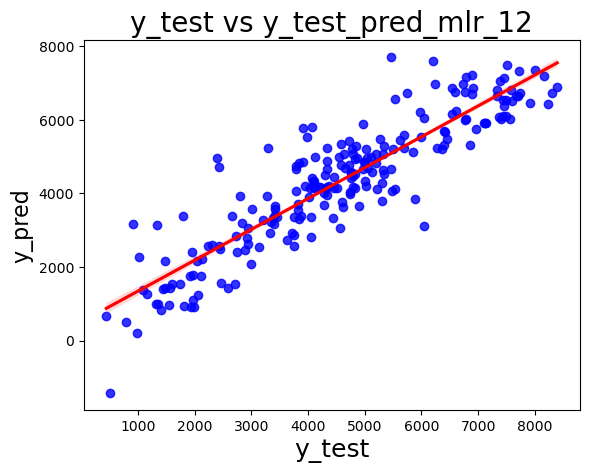

In [172]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred_mlr_12, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred_mlr_12', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

#### Checking R2 and R2 Adjusted

In [174]:

from sklearn.metrics import mean_squared_error,r2_score

mse = np.sqrt(mean_squared_error(y_test, y_test_pred_mlr_12))
rsquared_test = r2_score(y_test, y_test_pred_mlr_12)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',rsquared_train)
print('R-squared for test data:',rsquared_test)
print('Mean Squared Error',round(mse,3))

R-squared for train data: 0.8383720538037395
R-squared for test data: 0.7932468898827073
Mean Squared Error 861.338


In [181]:
# n is number of rows in X

n = x_test_mlr_12.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = x_test_mlr_12.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-rsquared_test)*(n-1)/(n-p-1)
print('Adjusted R-squared for test data:', adjusted_r2)



Adjusted R-squared for test data: 0.7812030193904378


## Final Result Comparison

__R-squared for train data: 0.84,
<br>
R-squared for test data: 0.79,
<br>
Mean Squared Error 861.338,
<br>
Adjusted R-squared for test data: 0.78__

This seems to be a good model that can very well 'Generalize' various datasets.

In [185]:
round(mlr_12.params.to_frame())

,0
const,2279.0
year,2034.0
holiday,-923.0
temp,3913.0
windspeed,-1213.0
july,-612.0
sep,491.0
sun,-416.0
Light_snowrain,-2535.0
Misty,-722.0


## Multiple Linear Regression Model Summary

Dependent Variable: count

Coefficients:

const 	2279.0
<br>
year 	2034.0
<br>
holiday 	-923.0
<br>
temp 	3913.0
<br>
windspeed 	-1213.0
<br>
july 	-612.0
<br>
sep 	491.0
<br>
sun 	-416.0
<br>
Light_snowrain 	-2535.0
<br>
Misty 	-722.0
<br>
spring 	-958.0
<br>
winter 	429.0
<br>

__Interpretation:__

The constant term (intercept) is 2279.0.
The variables and their coefficients mentioned above represents the impact on the dependent variable 'count'
<br>
<br>
__Regression Equation: count = 2279.0 + year * 2034.0 + holiday *	-923.0 + temp *	3913.0 + windspeed * -1213.0 +
july * -612.0 + sep * 491.0 + sun *	-416.0 + Light_snowrain * -2535.0 + Misty *	-722.0 + spring * -958.0 +
winter * 429.0__


## Final Report on Bike Booking Prediction

__Overview__

The final multiple linear regression model aims to predict bike bookings based on a set of predictor variables. After thorough analysis, I have identified the impact of each variable on bike bookings.

Top Predictor Variables:
<br>
Year (year):
<br>
Coefficient: 2034
<br>
Interpretation: A unit increase in the year variable increases the bike hire numbers by 2034 units.
<br>
<br>
Temperature (temp):
<br>
Coefficient: 3913
<br>
Interpretation: A unit increase in the temperature variable increases the bike hire numbers by 3913 units.
<br>
<br>
Windspeed (windspeed):
<br>
Coefficient: -1213.0 
<br>
Interpretation: A unit increase in windspeed decreases the bike hire numbers by 1213.0  units.
<br>
<br>
Light/Slow Rain (Light_snowrain):
<br>
Coefficient: -2535.0 
<br>
Interpretation: A unit increase in Light_snowrain decreases the bike hire numbers by 2535.0   units.
